In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255, x_test / 255

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [4]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=[28, 28, 1], activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
history = model.fit(x_train,
                    y_train,
                    batch_size = 100,
                    epochs = 10,
                    validation_data=(x_test, y_test))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 72s 114ms/step - accuracy: 0.6645 - loss: 0.9254 - val_accuracy: 0.8103 - val_loss: 0.5132
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 71s 96ms/step - accuracy: 0.8329 - loss: 0.4536 - val_accuracy: 0.8500 - val_loss: 0.4161
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 86s 103ms/step - accuracy: 0.8624 - loss: 0.3784 - val_accuracy: 0.8477 - val_loss: 0.4075
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.8748 - loss: 0.3401 - val_accuracy: 0.8757 - val_loss: 0.3432
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 61s 102ms/step - accuracy: 0.8886 - loss: 0.3012 - val_accuracy: 0.8774 - val_loss: 0.3384
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 60s 100ms/step - accuracy: 0.8954 - loss: 0.2829 - val_accuracy: 0.8845 - val_loss: 0.3267
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 81s 98ms/step - accuracy: 0.9023 - loss: 0.2621 - val_accuracy: 0.8867 - val_loss: 0.3213
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 83s 101ms/step - accuracy: 0.9097 - loss: 0.24

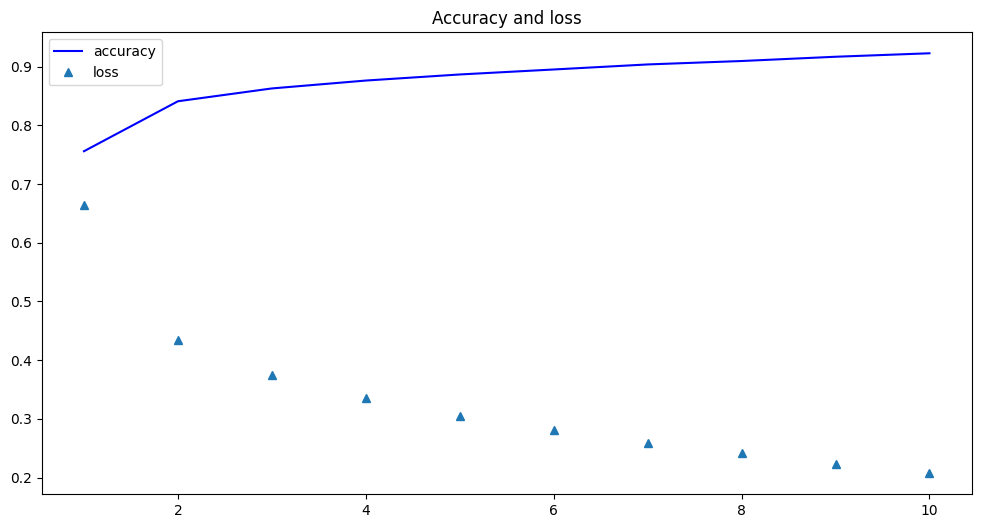

In [7]:
import matplotlib.pyplot as plt

loss = history.history['loss']
accuracy = history.history['accuracy']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12,6))
plt.plot(epochs, accuracy, "b", label="accuracy")
plt.plot(epochs, loss, "^", label="loss")

plt.title("Accuracy and loss")
plt.legend()

plt.show()

# **II ЧАСТИНА**

In [2]:
from keras.applications.vgg16 import VGG16
import numpy as np

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, y_train = x_train[:8000], y_train[:8000]
x_test, y_test = x_test[:2000], y_test[:2000]
x_train, x_test = x_train / 255, x_test / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [3]:
base = VGG16(weights ='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base.layers:
    layer.trainable = False

x_train = np.repeat(x_train[..., np.newaxis], 3, axis=-1)
x_test = np.repeat(x_test[..., np.newaxis], 3, axis=-1)

x_train = np.array(tf.image.resize(x_train, (224, 224)))
x_test = np.array(tf.image.resize(x_test, (224, 224)))

In [4]:
modelvg = Sequential([
   base,
   Flatten(),
   Dense(256, activation="relu"),
   Dense(10, activation="softmax"),
])

modelvg.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=["accuracy"]
)

In [ ]:
history = modelvg.fit(x_train,
                    y_train,
                    batch_size = 50,
                    epochs = 10,
                    validation_data=(x_test, y_test))